In [2]:
!pip3 install torch
!pip3 install torchvision 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
from torch.utils.data import TensorDataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import math

# Q1 gradient descent로 simple linear regression 추정하기

예제로 사용할 데이터 생성하기

$ y_i = \beta_0 + \beta_1 \times x_i + \epsilon_i \quad \epsilon_i \sim  iid N(0, 1)$ 

$ \beta_0 = 5, \beta_1 = 2$라는 모형을 따르는 데이터를 생성해준다. 

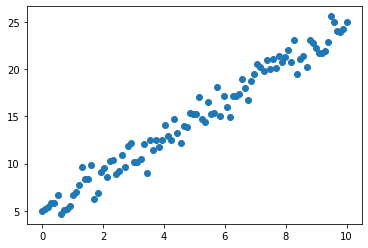

In [3]:
x_train_np = np.linspace(0, 10, 100).reshape(-1, 1)
y_train_np = 2 *  x_train_np + 5 + norm.rvs(0, 1, size = len(x_train_np)).reshape(-1, 1)

plt.scatter(x_train_np, y_train_np)
plt.show()

$ \hat{y_i} = \beta_0 + \beta_1 \times x_i $

$ \hat{y_i} = bias + weight \times x_i $

gradient descent를 사용해 bias와 weight를 학습해보자. 

1) 추정된 bias와 weight의 결과값은 얼마인가? 그래프를 그려 실제 회귀식에 가깝게 추정되었는지를 확인해보자. 

In [5]:
x_train = torch.FloatTensor(x_train_np)
y_train = torch.FloatTensor(y_train_np)

W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.01)

n_epochs = 1000
for epoch in range(n_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b
  
  # cost 계산: MSE
  cost = torch.mean((hypothesis - y_train) ** 2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
          epoch, n_epochs, W.item(), b.item(), cost.item()
      ))

Epoch    0/1000 W: 1.815, b: 0.295 Cost: 252.754745
Epoch  100/1000 W: 2.391, b: 2.150 Cost: 2.911060
Epoch  200/1000 W: 2.233, b: 3.200 Cost: 1.749895
Epoch  300/1000 W: 2.137, b: 3.839 Cost: 1.320701
Epoch  400/1000 W: 2.078, b: 4.228 Cost: 1.162060
Epoch  500/1000 W: 2.043, b: 4.464 Cost: 1.103423
Epoch  600/1000 W: 2.021, b: 4.607 Cost: 1.081749
Epoch  700/1000 W: 2.008, b: 4.695 Cost: 1.073738
Epoch  800/1000 W: 2.000, b: 4.748 Cost: 1.070777
Epoch  900/1000 W: 1.995, b: 4.780 Cost: 1.069683
Epoch 1000/1000 W: 1.992, b: 4.800 Cost: 1.069278


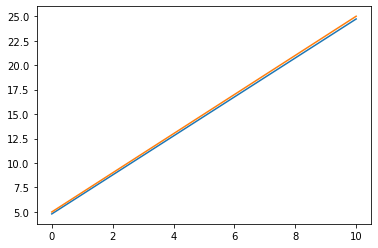

In [6]:
y_pred = W * x_train + b # 추정한 회귀식
y_real = 2 * x_train + 5 # 실제 회귀식

plt.plot(x_train_np, y_pred.detach().numpy())
plt.plot(x_train_np, y_real.detach().numpy())

2) learning rate를 0.03으로 조정해보자. 어떠한 문제가 발생하는가?

답: cost(MSE)가 최소가 되는 점을 찾지 못하고 발산한다. 

In [7]:
# 직접 W와 b를 정의하지 않고, nn.Module을 사용해 손쉽게 선형 모델을 생성할 수 있습니다. 
# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 1 # your code here
out_features = 1 # your code here

model = nn.Linear(in_features = in_features, out_features = out_features, bias = True)

optimizer = optim.SGD(model.parameters(), lr = 0.03)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 6.010, b: 0.199 Cost: 340.656281
Epoch  100/1000 W: 703.656, b: 109.165 Cost: 15480614.000000
Epoch  200/1000 W: 151313.766, b: 22755.871 Cost: 720248635392.000000
Epoch  300/1000 W: 32637716.000, b: 4907411.000 Cost: 33510161624596480.000000
Epoch  400/1000 W: 7039927296.000, b: 1058524672.000 Cost: 1559098058774648193024.000000
Epoch  500/1000 W: 1518503329792.000, b: 228322230272.000 Cost: 72538472985813433446301696.000000
Epoch  600/1000 W: 327539272712192.000, b: 49248838090752.000 Cost: 3374924058463756153753046089728.000000
Epoch  700/1000 W: 70649811132481536.000, b: 10622911190663168.000 Cost: 157021433680753148051973425380458496.000000
Epoch  800/1000 W: 15239097020556771328.000, b: 2291352270593327104.000 Cost: inf
Epoch  900/1000 W: 3287052956078018920448.000, b: 494241946790612959232.000 Cost: inf
Epoch 1000/1000 W: 709012858264013064110080.000, b: 106607264824075357257728.000 Cost: inf


3) learning rate를 0.00000001로 조정해보자. 어떠한 문제가 발생하는가?

답: cost가 최소가 되는 점을 찾기까지 시간이 오래걸린다. epoch수를 늘리면 찾을수도 있지만 비효율적이다. 

In [8]:
W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.00000001)

n_epochs = 1000
for epoch in range(n_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b 
  
  # cost 계산: MSE
  cost = torch.mean((hypothesis - y_train)**2)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
          epoch, nb_epochs, W.item(), b.item(), cost.item()
      ))

Epoch    0/1000 W: 0.000, b: 0.000 Cost: 252.754745
Epoch  100/1000 W: 0.000, b: 0.000 Cost: 252.720932
Epoch  200/1000 W: 0.000, b: 0.000 Cost: 252.687164
Epoch  300/1000 W: 0.001, b: 0.000 Cost: 252.653366
Epoch  400/1000 W: 0.001, b: 0.000 Cost: 252.619553
Epoch  500/1000 W: 0.001, b: 0.000 Cost: 252.585754
Epoch  600/1000 W: 0.001, b: 0.000 Cost: 252.551987
Epoch  700/1000 W: 0.001, b: 0.000 Cost: 252.518204
Epoch  800/1000 W: 0.001, b: 0.000 Cost: 252.484451
Epoch  900/1000 W: 0.002, b: 0.000 Cost: 252.450684
Epoch 1000/1000 W: 0.002, b: 0.000 Cost: 252.416916


# Q2. train set and test set - MNIST

MNIST dataset을 불러온다. 

In [9]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = 100, 
                         shuffle = True
                         )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



1) epoch 수를 15로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

In [10]:
# train model with train sets

# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 784 # your code here
out_features = 10 # your code here
linear = torch.nn.Linear(in_features = in_features, out_features=out_features, bias = True)

criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.534844875
Epoch: 0002 cost = 0.359366417
Epoch: 0003 cost = 0.331227601
Epoch: 0004 cost = 0.316190422
Epoch: 0005 cost = 0.306821167
Epoch: 0006 cost = 0.300326347
Epoch: 0007 cost = 0.295111746
Epoch: 0008 cost = 0.290701479
Epoch: 0009 cost = 0.287361264
Epoch: 0010 cost = 0.284519643
Epoch: 0011 cost = 0.281792253
Epoch: 0012 cost = 0.279430926
Epoch: 0013 cost = 0.277635366
Epoch: 0014 cost = 0.276077867
Epoch: 0015 cost = 0.274397463


In [ ]:
# Test the model using test sets
with torch.no_grad(): # torch.no_grad()를 사용하는 이유를 간단하게 설명해봅시다.
    # Answer : Testing 시에는, gradient descent를 통해, weight값을 업데이트 하지 않기 때문입니다

    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

2) epoch 수를 30으로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

어떠한 문제가 발생하는가?

In [12]:
linear = torch.nn.Linear(784, 10, bias = True)
criterion = torch.nn.CrossEntropyLoss()   
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 30

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch % 5 == 0:
      print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.533867478
Epoch: 0006 cost = 0.299936056
Epoch: 0011 cost = 0.281764925
Epoch: 0016 cost = 0.272817284
Epoch: 0021 cost = 0.267246068


KeyboardInterrupt: 

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

# Q3. XOR problem with multilayer perceptron



In [16]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [0], [1]])

# 입출력값의 차원을 고려하여 아래 빈칸을 적절하게 채워주세요
linear1 = torch.nn.Linear(2, 2, bias = True)
linear2 = torch.nn.Linear(2, 1, bias = True)
sigmoid = torch.nn.Sigmoid()

# 딥러닝의 구조를 고려하여 multi perceptron 모델을 적절하게 생성하세요. 
# nn.Sequential 함수를 사용하세요
model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# 이 예제에서 cross entropy 대신 BCE를 사용하는 이유를 간단하게 설명하세요
# Answer : 다중 분류 문제가 아니라, 이진 분류의 문제이기 때문에 cross entropy 대신 BCE를 사용하게 됩니다.

criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

for step in range(301):
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if step%50 == 0:
    print(step, cost.item())

0 0.8069935441017151
50 0.5525302886962891
100 0.11521770805120468
150 0.042607154697179794
200 0.02432074397802353
250 0.016639262437820435
300 0.01251970324665308


## Q4. Sine Function Approximation using the Legendre *Polynomial*

n = 3일때 르장드르 다항식은 다음과 같다. \
$ P_{3} = \frac{1}{2} (5x^{3} -3x) $ \
이 함수를 사용하여, sine함수를 근사하도록 학습하려고 한다.


1) Forward, Backward 함수를 직접 작성하여보자.

In [68]:
# 이 클래스에서, forward, backward 함수가 하는 기능이 무엇인지 설명해주세요.
# Answer : Forward는 주어진 가중치와 input을 바탕으로 값을 계산하는 과정이고,
#          Backward는 gradient를 계산하는 과정이라 할 수 있습니다.

class Legendre3Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)
        # Hint : Legendre Polynomial의 differential

2) 학습을 위한 parameter와 Data를 세팅해보자.
   우리가 사용하려는 모델은 다음과 같다.\
   $ y = a + b * P_{3}(c + d * x) $

In [69]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x) # Target function to approximate

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

3) 1)에서 정의한 forward, backward 함수를 사용하여,
   딥러닝 학습 과정을 직접 작성해보자.\
   \
   Learning rate의 경우, 5e-2, 5e-4, 5e-6, 5e-8 중,
   가장 적절한 Learning rate를 찾아보자. \
   적절한 learning rate보다 learning rate가 크거나 작을 때,
   어떤 현상이 발생하는지 살펴보자.

In [70]:
# [5e-2, 5e-4, 5e-6, 5e-8] 중 적절한 learning rate를 찾아주세요.
# 적절한 learning rate보다 learning rate가 크거나 작을 때, 어떤 차이가 생기는지
# 말씀해주세요.
learning_rate = 5e-6

# epoch = 2000
for t in range(2000):
    P3 = Legendre3Function.apply

    # Forward pass: predict y.
    # P3 using our custom backward function.
    y_pred = a + b * P3(c + d * x)

    # Compute and print MSE loss
    # loss = torch.nn.MSELoss(y_pred, y)
    fun = torch.nn.MSELoss()
    loss = fun(y_pred, y)
    # loss = F.mse_loss(y_pred, y) 
    
    if t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

0 0.23095129430294037
100 0.2254035919904709
200 0.2203693687915802
300 0.2157878875732422
400 0.21160580217838287
500 0.20777994394302368
600 0.20427197217941284
700 0.20104797184467316
800 0.19807898998260498
900 0.195337176322937
1000 0.19280217587947845
1100 0.1904541552066803
1200 0.18827584385871887
1300 0.18625156581401825
1400 0.18436777591705322
1500 0.18261200189590454
1600 0.1809733510017395
1700 0.17944201827049255
1800 0.17800915241241455
1900 0.17666637897491455
Result: y = 1.854395630107586e-11 + -1.0020300149917603 * P3(-6.774623223515519e-11 + 0.2771138548851013 x)


## Q5. Different Basis Function for approximating sine function

이번에는 ReLu function을 사용하여 sine함수를 학습해보려 한다. \
ReLu function을 사용했을 때에도, 학습이 잘 되는지 살펴보자.

In [43]:
class ReLuFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0.0)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        # Hint : reLu function의 도함수의 형태를 반영하면 됩니다.
        return grad_input

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Our model : y = a + b * ReLu(c + d * x).
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-7
for t in range(2000):
    ReLu = ReLuFunction.apply

    # Forward pass: predict y.
    # ReLu using our custom backward function.
    y_pred = a + b * ReLu(c + d * x)

    # Compute and print MSE loss
    fun = torch.nn.MSELoss()
    loss = fun(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * ReLu({c.item()} + {d.item()} x)')

99 1.146151065826416
199 1.1454650163650513
299 1.1447793245315552
399 1.1440939903259277
499 1.1434091329574585
599 1.1427247524261475
699 1.1420406103134155
799 1.1413570642471313
899 1.140674114227295
999 1.139991044998169
1099 1.1393088102340698
1199 1.1386269330978394
1299 1.1379454135894775
1399 1.1372642517089844
1499 1.136583685874939
1599 1.1359034776687622
1699 1.135223388671875
1799 1.134544014930725
1899 1.1338649988174438
1999 1.1331865787506104
Result: y = -0.001565995393320918 + 0.9977350234985352 * ReLu(-0.0009294261690229177 + 0.9977350234985352 x)


## Q6. 
Q4, Q5에서 학습한 결과를 바탕으로, 어떤 function을 사용하는 것이 학습에 더 적절했었는지 코멘트해주세요.

Answer : 'Relu Function : 1.14 / Legendre function : 0.17'
         'Relu Function <<< Legendre function'

## Q7. Deep Learning Example

주어진 데이터를 로딩하고, 아래 코드의 빈칸을 채워
딥러닝 학습을 하는 코드를 완성하여보자.

In [ ]:
# 업로드 시간이 7분 30초 가량 걸리기에, 그동안 밑에 코드 작성 먼저 해주셔도 됩니다. (colab 사용시)
# colab 사용하시면, 주석 지우고 사용해주세요

# from google.colab import files
# uploaded = files.upload()

Saving testX.csv to testX.csv
Saving testY.csv to testY.csv
Saving trainX.csv to trainX.csv
Saving trainY.csv to trainY.csv


In [55]:
# Data Loading using pd.read_csv

train_X = pd.read_csv('trainX.csv')
train_Y = pd.read_csv('trainY.csv')

test_X = pd.read_csv('testX.csv')
test_Y = pd.read_csv('testY.csv')

In [56]:
# Data Setting
train_X = np.array(train_X)
train_Y = np.array(train_Y)

test_X = np.array(test_X)
test_Y = np.array(test_Y)

input_dim = len(train_X[0])

# Data type casting to torchTensor
train_x = torch.FloatTensor(train_X)
train_y = torch.FloatTensor(train_Y)

# Set batch size
batch_size = 4096
dataset = TensorDataset(train_x, train_y)

# DataLoader setting
# 셔플이 있고, batch size에 맞게 dataloader를 세팅해주세요,
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [60]:
# Model Setting
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, int(input_dim/6)),
    # 각 Layer의 activation function을 설정해주세요.
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    torch.nn.Linear(int(input_dim/6), int(input_dim/5)),
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    torch.nn.Linear(int(input_dim/5), 1),
    torch.nn.Sigmoid(),
    # Hint : Output layer activation function for binary classification
    )

In [61]:
params = list(model.parameters())
print("The number of parameters:", sum([p.numel() for p in model.parameters() if p.requires_grad]), "elements")
x = torch.from_numpy(train_X.astype(np.float32))
y = torch.from_numpy(train_Y.astype(np.float32)).view(-1, 1)

# loss function 부분을 채워주세요.
# BCE loss를 사용합니다.
loss_fn = torch.nn.BCELoss()

The number of parameters: 1977 elements


In [62]:
learning_rate = 1e-3
iter = 200
loss_list = []
# Adam optimizer를 설정해주세요. learning rate, 그리고 weight_decay는 5e-2로 설정해주세요.
optimizer = torch.optim.Adam(model.parameters(), lr=5e-2, weight_decay = 5e-2)

prev_loss = 1e+30

for t in range(iter+1):
    for batch, sample in enumerate(dataloader):
      trainx, trainy = sample
      y_pred = model(trainx)

      loss = loss_fn(y_pred, trainy)

      # gradient 계산 및 gradient descent 계산을 통한 optimization 부분
      # 코드를 채워주세요.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
      loss_list.append(loss.item())

    cur_loss = np.mean(loss_list[max(0, len(loss_list)-batch-1):len(loss_list)-1])
    
    if t % 10 == 0:
      print('iter {}/{} loss: {:.4f}'.format(
             t, iter, cur_loss))

iter 0/200 loss: 0.7010
iter 10/200 loss: 0.5391
iter 20/200 loss: 0.5230
iter 30/200 loss: 0.5112
iter 40/200 loss: 0.5032
iter 50/200 loss: 0.4853
iter 60/200 loss: 0.4907
iter 70/200 loss: 0.4896
iter 80/200 loss: 0.4917
iter 90/200 loss: 0.4827
iter 100/200 loss: 0.4791
iter 110/200 loss: 0.4870
iter 120/200 loss: 0.4753
iter 130/200 loss: 0.4804
iter 140/200 loss: 0.4811
iter 150/200 loss: 0.4855
iter 160/200 loss: 0.4800
iter 170/200 loss: 0.4903
iter 180/200 loss: 0.4851
iter 190/200 loss: 0.4772
iter 200/200 loss: 0.4888


Weighted F1: 0.8185395650730694


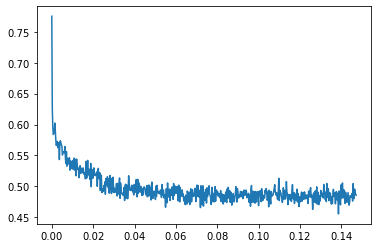

In [67]:
y_predict = model(torch.from_numpy(test_X.astype(np.float32)))
y_pred = y_predict.detach().numpy()

# test set의 prediction값을 계산하는 식을 작성하고, weighted f1 score를 계산해주세요.
y_pred = [1 if t > 0.5 else 0 for t in y_pred]
result = f1_score(y_pred, test_Y, average="weighted")

# 결과물 출력
print("Weighted F1:", result)
step = np.linspace(0, len(loss_list), len(loss_list))
plt.plot(step/int(batch_size + 1), np.array(loss_list))